# Australian Open Predicition

## Data Loading

In [49]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Suppress warngings from chunks
from warnings import simplefilter
simplefilter('ignore')

In [50]:
# Get current working directory
src =  os.getcwd()
# Load data for male players
maleDF = pd.read_csv(src+'\\data\\ATP_matches.csv')
maleSubmission = pd.read_csv(src+'\\data\\men_dummy_submission_file.csv')
# Load data for female players
femaleDF = pd.read_csv(src+'\\data\\WTA_matches.csv')

# Display tensor sizes
print("Male data: \n" + str(maleDF.shape[0]) + " Observations of " + str(maleDF.shape[1]) + " Variables\n")
print("Female Data: \n" + str(femaleDF.shape[0]) + " Observations of " + str(femaleDF.shape[1]) + " Variables")

Male data: 
20807 Observations of 35 Variables

Female Data: 
13906 Observations of 35 Variables


In [51]:
# Show top of male dataframe
maleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Edouard Roger-Vasselin,Eric Prodon,Chennai,2-Jan-12,Hard,First Round,106,97,0,2,...,3,21,33,13,26,1,3,15,49,49
1,Dudi Sela,Fabio Fognini,Chennai,2-Jan-12,Hard,First Round,83,48,0,2,...,4,17,32,5,26,0,1,8,33,30
2,Go Soeda,Frederico Gil,Chennai,2-Jan-12,Hard,First Round,120,102,0,2,...,2,45,70,18,35,2,4,36,103,99
3,Yuki Bhambri,Karol Beck,Chennai,2-Jan-12,Hard,First Round,345,101,0,2,...,1,15,33,13,29,2,3,15,46,43
4,Yuichi Sugita,Olivier Rochus,Chennai,2-Jan-12,Hard,First Round,235,67,0,2,...,0,19,32,13,22,1,7,30,78,62


In [52]:
# Show top of female dataframe
femaleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Johanna Larsson,Lourdes Dominguez-Lino,Auckland,1-Jan-14,Hard,First Round,84,69,0.0,2,...,4,16,32,13,33,2,8,24,62,53
1,Ana Konjuh,Roberta Vinci,Auckland,1-Jan-14,Hard,First Round,259,14,0.0,2,...,1,34,65,10,23,5,6,30,68,74
2,Ayumi Morita,Lucie Safarova,Auckland,1-Jan-14,Hard,First Round,60,29,0.0,2,...,3,21,32,12,32,3,5,26,68,59
3,Venus Williams,Andrea Hlavackova,Auckland,1-Jan-14,Hard,First Round,47,134,0.0,2,...,4,23,34,12,28,2,6,30,82,65
4,Julia Goerges,Karin Knapp,Auckland,1-Jan-14,Hard,First Round,72,41,0.0,2,...,4,52,70,30,58,2,2,28,102,110


## Data Cleaning

In [53]:
# Function to replace "." with NaN in a dataframe
def replaceMissingWithNaN(dataFrame):
    for column in list(dataFrame.columns.values):
        if (dataFrame[column].dtype.name == 'object'):
            # Different encodings for none in the database
            dataFrame[column] = dataFrame[column].replace({".":np.nan})

In [54]:
# Function to replace "." and NaN with 0 in a slice
def replaceMissingWithZero(sliceDF):
    # Different encodings for none in the database
    sliceDF = sliceDF.replace({np.nan:0})
    return sliceDF

In [55]:
# Encodes the variables fed into the functions as catagorical, boolean and numeric
# preseving missing data if specified, changin to zeros otherwise
def changeDataTypes(dataFrame, catagorical, boolean, numeric):
    for variable in list(maleDF.columns.values):
        if variable in catagorical:
            dataFrame[variable] = dataFrame[variable].astype('category')
        elif variable in boolean:
            dataFrame[variable] = dataFrame[variable].astype('bool')
        elif variable in numeric:
            # Keep as a float as can't save variables as ints and keep NaNs
            dataFrame[variable] = dataFrame[variable].astype('float64')
        else:
            # Replaces missing with zeros and then saves as integers
            dataFrame[variable] = replaceMissingWithZero(dataFrame[variable])
            dataFrame[variable] = dataFrame[variable].astype('int64')

In [56]:
# Convert missing entries to Nan
replaceMissingWithNaN(maleDF)
replaceMissingWithNaN(femaleDF)

In [57]:
# Check the datatypes of variables loaded
# List of Catagorical data
catagories = {'Winner', 'Loser', 'Tournament', 'Tournament_Date',
              'Court_Surface', 'Round_Description'}
# Boolean
boolean = {'Retirement_Ind'}

# Numeric that should keep missing values
numeric = {'Winner_Rank', 'Loser_Rank'}

changeDataTypes(maleDF, catagories, boolean, numeric)
changeDataTypes(femaleDF, catagories, boolean, numeric)

print("===== MALE DATA =====")
print(maleDF.dtypes)
print("\n==== FEMALE DATA ====")
print(femaleDF.dtypes)

===== MALE DATA =====
Winner                       category
Loser                        category
Tournament                   category
Tournament_Date              category
Court_Surface                category
Round_Description            category
Winner_Rank                   float64
Loser_Rank                    float64
Retirement_Ind                   bool
Winner_Sets_Won                 int64
Winner_Games_Won                int64
Winner_Aces                     int64
Winner_DoubleFaults             int64
Winner_FirstServes_Won          int64
Winner_FirstServes_In           int64
Winner_SecondServes_Won         int64
Winner_SecondServes_In          int64
Winner_BreakPoints_Won          int64
Winner_BreakPoints              int64
Winner_ReturnPoints_Won         int64
Winner_ReturnPoints_Faced       int64
Winner_TotalPoints_Won          int64
Loser_Sets_Won                  int64
Loser_Games_Won                 int64
Loser_Aces                      int64
Loser_DoubleFaults          

In [58]:
# Check catagorical variables for unique values
# Print headers for columns
print('{:-^43}'.format('-'))
print('{:<28s}{:^15s}'.format('Variable', 'Unique Values'))
print('{:-^43}'.format('-'))

# Display the variable and number of unique values
for variable in list(maleDF.columns.values):
    if (maleDF[variable].dtype.name == 'category'):
        print('{:<28s}{:>12d}'.format(variable + ":", maleDF[variable].unique().size))

-------------------------------------------
Variable                     Unique Values 
-------------------------------------------
Winner:                              548
Loser:                               767
Tournament:                           86
Tournament_Date:                     255
Court_Surface:                         4
Round_Description:                     9


## Univariate Visualisation

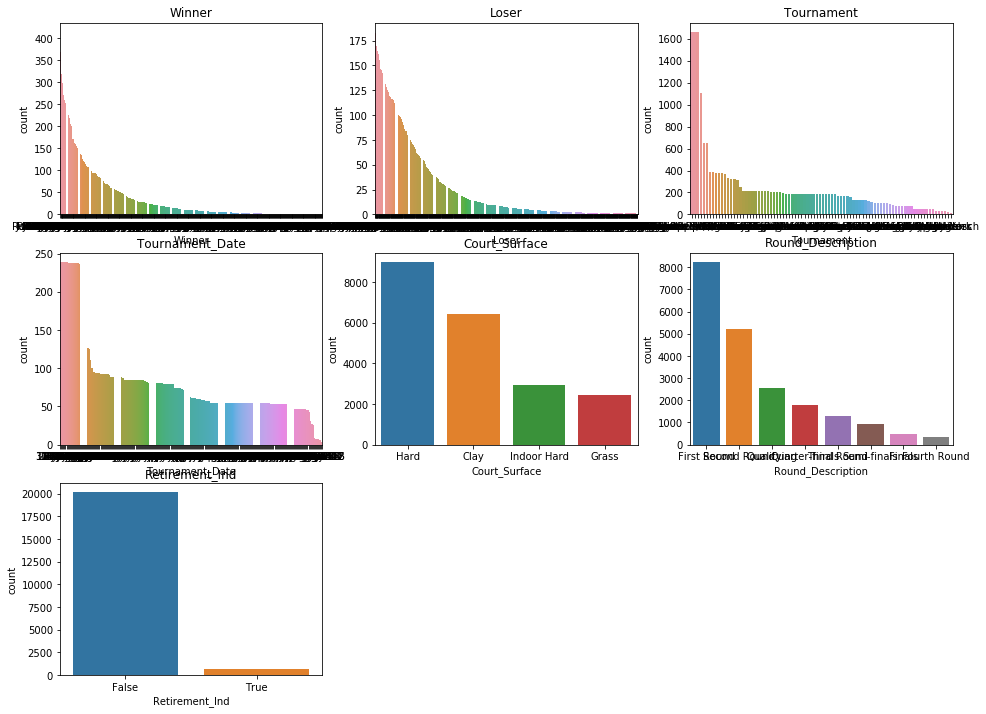

In [59]:
# Frequency of observations for different catagorical variables
# Long run time!
f = plt.figure(figsize=(16, 12))
counter = 1

for variable in list(maleDF.columns.values):
    if maleDF[variable].dtype.name == 'category' or maleDF[variable].dtype.name == 'bool':
        f.add_subplot(3, 3, counter)
        plt.title(variable)
        sns.countplot(x = variable, 
                      data = maleDF,
                      order = maleDF[variable].value_counts().index)
        counter +=1
        
# Save the plot
plt.savefig(src+'\\img\\AllCatagoricalBarCharts')  

These barcharts show the sample representation proportions of different categoires that split the data. Of particular interest is the a player that wins more often is likely to play more game overall than players how lose creating a sampling skew towards winners. Explicitly observed in the first two charts showing the highest sampled winner has over 400 matches recorded and the highest sampled loser is sampled slightly over 175 times. Tournament and Date are sampled in similar ways, starting with a large number of intial samples into a uniform mid-season and an undersampled final tournament. This is reflected in the structure of the overall season of the sport as players are intialy knocked out rapidly, play off and qualify for the final event. This is also seen in the sampling of rounds in each tournament with a large number of first round matches exponentially decaying towards the finals. Matches are most likely to be played on Hard or Clay surfaces that are outdoors, Grass being the least represented surface. The final chart shows that it is rare for a player to retire from a match.

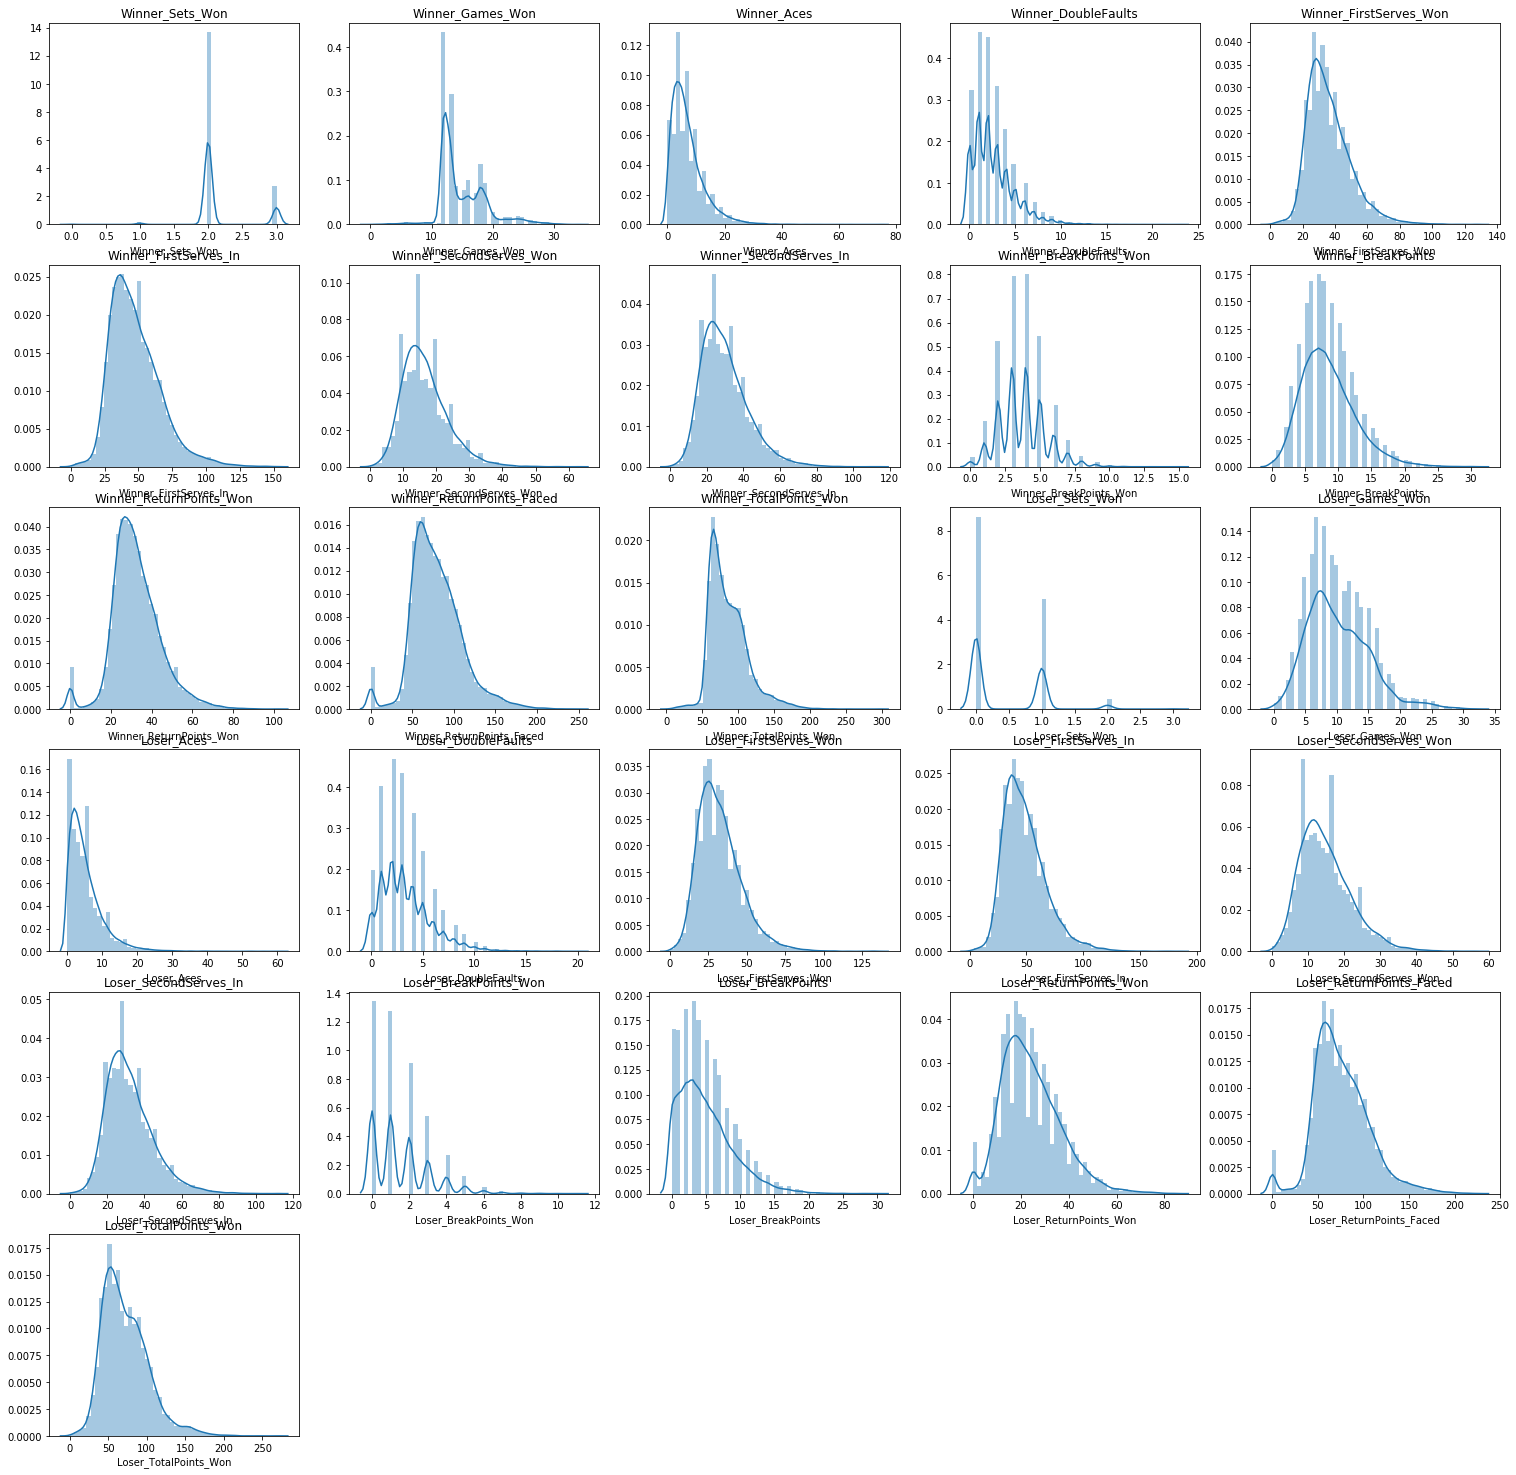

In [60]:
# Histograms for numeric data
f = plt.figure(figsize=(26, 26))
counter =1

for variable in list(maleDF.columns.values):
    if maleDF[variable].dtype.name == 'int64':
        f.add_subplot(6, 5, counter)
        plt.title(variable)
        sns.distplot(maleDF[variable])
        counter +=1
        
# Save the plot
plt.savefig(src+'\\img\\AllDiscreteHistograms')  

The above histograms relating to total points show that although a player is a loser/winner the ditribution of how many points they win overall approximates a normal distribution. In each distributions winners are have a higher observed mean than losers.  but the overall kurtosis and variance appear to be shared.

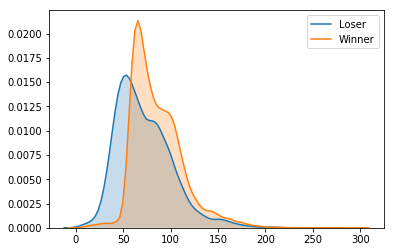

In [61]:
# An example of how the distribution of total points follows the a trend under some mean shift
snsPlot = sns.kdeplot(maleDF['Loser_TotalPoints_Won'], label = 'Loser', shade = True)
snsPlot = sns.kdeplot(maleDF['Winner_TotalPoints_Won'], label = 'Winner', shade = True)
snsPlot.figure.savefig(src+"\\img\\TotalPointsWon.png")

# Summary Statistics

In [62]:
def summariseLifetimePlayerStats(DF, stats):
    # Create dataframes for lossing and winner player stats
    # for each game
    winnerDF = DF.loc[:, DF.columns.str.startswith('Winner')]
    loserDF = DF.loc[:, DF.columns.str.startswith('Loser')]
    # Drop Ranks
    winnerDF = winnerDF.drop('Winner_Rank', axis = 1)
    loserDF = loserDF.drop('Loser_Rank', axis = 1)
    
    # Rename Variables
    winnerDF.columns = ['Player'] + stats
    loserDF.columns = ['Player'] + stats
    
    # Combine winners and losers into a single DF
    combinedDF = pd.concat([winnerDF, loserDF])
    # Group by unique player names
    combinedDF = combinedDF.groupby(['Player'])

    # Calculate tournament summary statistics
    statsToSum = {x:'sum' for x in stats}
    combinedDF = combinedDF[stats].agg(statsToSum)
    
    return combinedDF

In [63]:
def summarisePlayerStats(DF, stats):
    # Create dataframes for lossing and winner player stats
    # for each game  
    # Drop Winners/losers, ranks, retirement indicator and date
    winnerDF = DF.drop(['Loser', 'Loser_Rank', 'Winner_Rank', \
                        'Retirement_Ind', 'Tournament_Date', \
                        'Round_Description'], axis = 1)
    loserDF = DF.drop(['Winner', 'Loser_Rank', 'Winner_Rank', \
                       'Retirement_Ind', 'Tournament_Date', \
                       'Round_Description'], axis = 1)
    # Rename winner/loser to player
    winnerDF.columns.values[0] = "Player" 
    loserDF.columns.values[0] = "Player"
    # Find the remainin columns that need to be dropped
    dropFromWinner = winnerDF.loc[:, winnerDF.columns.str.startswith('Loser')].columns
    dropFromLoser = loserDF.loc[:, loserDF.columns.str.startswith('Winner')].columns
    # Drop the columns
    winnerDF = winnerDF.drop(dropFromWinner, axis = 1)
    loserDF = loserDF.drop(dropFromLoser, axis = 1)
    
    # Rename Variables
    winnerDF.columns = ['Player', 'Tournament', 'Court_Surface'] + stats
    loserDF.columns = ['Player', 'Tournament', 'Court_Surface'] + stats
    
    # Combine winners and losers into a single DF
    combinedDF = pd.concat([winnerDF, loserDF])
    # Group by unique player names
    combinedDF = combinedDF.groupby(['Player', 'Tournament', \
                                'Court_Surface'])

    # Calculate tournament summary statistics
    statsToSum = {x:'sum' for x in stats}
    combinedDF = combinedDF[stats].agg(statsToSum)
    
    return combinedDF

In [64]:
def addServeStatistics(lifetimeDF):
    # Total Serves Won
    lifetimeDF = lifetimeDF.assign(Total_Serves_Won = 
                         lifetimeDF['Total_FirstServes_Won'] +
                         lifetimeDF['Total_SecondServes_Won'])
    # Total serves
    lifetimeDF = lifetimeDF.assign(Total_Serves = 
                         lifetimeDF['Total_FirstServes_In'] +
                         lifetimeDF['Total_SecondServes_In'] +
                         lifetimeDF['Total_DoubleFaults'])
    # Probability of winning a serve
    lifetimeDF = lifetimeDF.assign(P_Win_Serve = 
                         lifetimeDF['Total_Serves_Won'] /
                         lifetimeDF['Total_Serves'])
    return lifetimeDF

In [65]:
# Names of total summary columns
statCols = ['Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', \
            'Total_FirstServes_Won', 'Total_FirstServes_In', 'Total_SecondServes_Won', \
            'Total_SecondServes_In', 'Total_BreakPoints_Won','Total_BreakPoints', \
            'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

# Calculate lifetime summary statistics and Tournament Summaries
maleTournSummaryDF = summarisePlayerStats(maleDF, statCols)
maleLifeSummaryDF = summariseLifetimePlayerStats(maleDF, statCols)
maleServeSummaryDF = addServeStatistics(maleLifeSummaryDF)

In [66]:
# Example of the tournament statistics and lifetime statistics
display(maleTournSummaryDF.loc[['Andreas Beck','David Goffin']])
display(maleLifeSummaryDF.loc[['Andreas Beck', 'David Goffin']])
display(maleServeSummaryDF.loc[['Andreas Beck', 'David Goffin']])

Total_Sets_Won  \
Player       Tournament                 Court_Surface                   
Andreas Beck Australian Open, Melbourne Hard                        8   
             Barcelona                  Clay                        0   
             Chennai                    Hard                        3   
             Dubai                      Hard                        0   
             French Open, Paris         Clay                       12   
             Geneva                     Clay                        0   
             Marseille                  Indoor Hard                 0   
             Montpellier                Indoor Hard                 1   
             Stuttgart                  Clay                        1   
             U.S. Open, New York        Hard                        7   
             Zagreb                     Indoor Hard                 1   
David Goffin 's Hertogenbosch           Grass                       0   
             's-Hertogenbosch           Grass                       7   
             Acapulco                   Hard                        5   
             Antwerp                    Indoor Hard                 8   
             Auckland                   Hard                        0   
             Australian Open, Melbourne Hard                       33   
             Barcelona                  Clay                        9   
             Basel                      Indoor Hard                21   
             Bastad                     Clay                        0   
             Beijing                    Hard                        3   
             Brisbane                   Hard                        5   
             Bucharest                  Clay                        3   
             Casablanca                 Clay                        0   
             Chennai                    Hard                        9   
             Cincinnati                 Hard                       20   
             Delray Beach               Hard                        0   
             Doha                       Hard                        2   
             Dubai                      Hard                        0   
             Dusseldorf                 Clay                        1   
...                                                               ...   
             London                     Grass                       4   
                                        Indoor Hard                 4   
             Madrid                     Clay                       12   
             Marseille                  Indoor Hard                 8   
             Memphis                    Indoor Hard                 0   
             Metz                       Indoor Hard                17   
             Miami                      Hard                       22   
             Monte-Carlo                Clay                       19   
             Montpellier                Indoor Hard                 5   
             Montreal                   Hard                        6   
             Munich                     Clay                        6   
             Newport                    Grass                       0   
             Oeiras                     Clay                        3   
             Paris                      Indoor Hard                 9   
             Rio de Janeiro             Hard                        4   
             Rome                       Clay                       21   
             Rotterdam                  Indoor Hard                16   
             Shanghai                   Hard                        8   
             Shenzhen                   Hard                        9   
             Sofia                      Indoor Hard                 6   
             Stockholm                  Indoor Hard                 0   
             Sydney                     Hard                        0   
             Tokyo                      

,Total_Sets_Won,Total_Games_Won,Total_Aces,Total_DoubleFaults,Total_FirstServes_Won,Total_FirstServes_In,Total_SecondServes_Won,Total_SecondServes_In,Total_BreakPoints_Won,Total_BreakPoints,Total_ReturnPoints_Won,Total_ReturnPoints_Faced,Total_Points_Won
Player,,,,,,,,,,,,,
Andreas Beck,33,341,93,108,931,1409,450,903,77,190,699,1838,2269
David Goffin,503,4485,1811,1216,11219,15686,5750,11269,1167,2827,10943,27575,28019


,Total_Sets_Won,Total_Games_Won,Total_Aces,Total_DoubleFaults,Total_FirstServes_Won,Total_FirstServes_In,Total_SecondServes_Won,Total_SecondServes_In,Total_BreakPoints_Won,Total_BreakPoints,Total_ReturnPoints_Won,Total_ReturnPoints_Faced,Total_Points_Won,Total_Serves_Won,Total_Serves,P_Win_Serve
Player,,,,,,,,,,,,,,,,
Andreas Beck,33,341,93,108,931,1409,450,903,77,190,699,1838,2269,1381,2420,0.570661
David Goffin,503,4485,1811,1216,11219,15686,5750,11269,1167,2827,10943,27575,28019,16969,28171,0.602357


# Probability functions

In [67]:

# Defines the probability player A wins a game on their serve
# p_a is the probability of a win, q_a the probability of a loss
def game_win_a(p_a):
    q_a = 1-p_a
    return p_a**4 * (1+ 4*q_a+10*(q_a**2)) + 20*(p_a*q_a)**3 *p_a**2 *(1-2* p_a*q_a)**(-1)

 # Calculated values for p_set_a_i_j, the probability player a wins the set on game (i,j) give A serves first

### game_a = game_win_a(p_a), and game_b =game_win_b(p_b)
def p_set_a_6_0(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return (p_game_a * q_game_b)**3

def p_set_a_6_1(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return 3*p_game_a**3 *q_game_a *q_game_b**3 + 3 *(p_game_a)**4 * p_game_b * (q_game_b)**2
    
def p_set_a_6_2(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return 12* (p_game_a)**3 * q_game_a * p_game_b * (q_game_b)**3 \
    + 6*(p_game_a)**2*(q_game_a)**2 *(q_game_b)**4 + 3*(p_game_a)**4 *(p_game_b)**2 *(q_game_b)**2
        
def p_set_a_6_3(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return 24*(p_game_a)**3 *(q_game_a)**2 * p_game_b * (q_game_b)**3 + 24*(p_game_a)**4 * q_game_a *(p_game_b)**2 *(q_game_b)**2 \
        +4 *(p_game_a)**2 *(q_game_a)**3 *(q_game_b)**4 + 4 *(p_game_a)**5*(p_game_b)**3 *q_game_b
        
def p_set_a_6_4(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return 60*(p_game_a)**3 *(q_game_a)**3 * (p_game_b)**2 *(q_game_b)**3 \
        + 40*(p_game_a)**2 *(q_game_a)**3 *(p_game_b) *(q_game_b)**4 \
        + 20*(p_game_a)**4*q_game_a*(p_game_b)**3*(q_game_b)**2 + 5*p_game_a * (q_game_a)**4 *(q_game_b)**5 \
        + p_game_a**5*(p_game_b)**4 *q_game_b
        
def p_set_a_7_5(p_game_a, p_game_b):
    q_game_a = 1 - p_game_a
    q_game_b = 1 - p_game_b
    return 100 * (p_game_a)**3*(q_game_a)**3 *(p_game_b)**2 * (q_game_b)**4 \
        + 100*(p_game_a)**4*(q_game_a)**2*(p_game_b)**3*(q_game_b)**3 \
        + 25*(p_game_a)**2*(q_game_a)**4*p_game_b * (q_game_b)**5 \
        + 25*(p_game_a)**5*q_game_a*(p_game_b)**4*(q_game_b)**2 \
        + p_game_a *(q_game_a)**5 * (q_game_b)**6 + (p_game_a)**6*(p_game_b)**5*q_game_b
        
        
def p_set_a_6_6(p_game_a, p_game_b):
    return 1 - ((  p_set_a_6_0(p_game_a, p_game_b)   + p_set_a_6_0(p_game_b, p_game_a) \
                +  p_set_a_6_1(p_game_a, p_game_b) + p_set_a_6_1(p_game_b, p_game_a) \
                +  p_set_a_6_2(p_game_a, p_game_b) + p_set_a_6_2(p_game_b, p_game_a) \
                +  p_set_a_6_3(p_game_a, p_game_b) + p_set_a_6_3(p_game_b, p_game_a) \
                +  p_set_a_6_4(p_game_a, p_game_b) + p_set_a_6_4(p_game_b, p_game_a))\
               + p_set_a_7_5(p_game_a, p_game_b) + p_set_a_7_5(p_game_b, p_game_a))


    
def p_tie_a_7_0(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return (p_a)**3 *(q_b)**4

def p_tie_a_7_1(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 3* (p_a)**3 *q_a *(q_b)**4 + 4*(p_a)**4 *p_b *(q_b)**3
    
def p_tie_a_7_2(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 16*(p_a)**4 *q_a*p_b*(q_b)**3 + 6 *(p_a)**5 *(p_b)**2 *(q_b)**2 + 6 *(p_a)**3 *(q_a)**2*(q_b)**4
    
def p_tie_a_7_3(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 40*(p_a)**3*(q_a)**2*p_b*(q_b)**4 + 10*(p_a)**2*(q_a)**3*(q_b)**5 \
        +4*(p_a)**5*(p_b)**3*(q_b)**2 + 30*(p_a)**4*q_a*(p_b)**2*(q_b)**3
    
def p_tie_a_7_4(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 50*(p_a)**4*q_a*(p_b)**3*(q_b)**3 + 5 *(p_a)**5*(p_b)**4 *(q_b)**2 \
        + 50 *(p_a)**2*(q_a)**3*p_b*(q_b)**5 + 5*p_a*(q_a)**4 * (q_b)**6 + 100*(p_a)**3*(q_a)**2*(p_b)**2*(q_b)**4
    
    
def p_tie_a_7_5(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 30*(p_a)**2*(q_a)**4*p_b*(q_b)**5+p_a*(q_a)**5*(q_b)**6 +200*(p_a)**4*(q_a)**2*(p_b)**3*(q_b)**3 \
        + 75*(p_a)**5*q_a*(p_b)**4*(q_b)**2 + 150*(p_a)**3*(q_a)**3*(p_b)**2*(q_b)**4 \
        + 6*(p_a)**6*(p_b)**5*q_b
        
def p_tie_a_6_6(p_a, p_b):
    q_a = 1 - p_a
    q_b = 1 - p_b
    return 1 - ( p_tie_a_7_0(p_a, p_b) + p_tie_a_7_0(q_a, q_b) \
               + p_tie_a_7_1(p_a, p_b) + p_tie_a_7_1(q_a, q_b)  \
               + p_tie_a_7_2(p_a, p_b) + p_tie_a_7_2(q_a, q_b)  \
               + p_tie_a_7_3(p_a, p_b) + p_tie_a_7_3(q_a, q_b)  \
               + p_tie_a_7_4(p_a, p_b) + p_tie_a_7_4(q_a, q_b)  \
               + p_tie_a_7_5(p_a, p_b) + p_tie_a_7_5(q_a, q_b)  )
        
   # p_A**T
  #  p_set_a = p_A**6(6,j) + p_A**S(7,5) + p_A**S(6,6) p_A**T
def p_tie_win_a(p_a, p_b):
    q_a = 1-p_a
    q_b = 1-p_b
    return p_tie_a_7_0(p_a, p_b)+ p_tie_a_7_1(p_a, p_b) + p_tie_a_7_2(p_a, p_b) \
        +p_tie_a_7_3(p_a, p_b)+ p_tie_a_7_4(p_a, p_b) + p_tie_a_7_5(p_a, p_b) \
        + p_tie_a_6_6(p_a, p_b)*p_a*q_b *(1- p_a*p_b - q_a*q_b)**(-1)
        
def p_set_win_a(p_a, p_b):
    p_game_a = game_win_a(p_a)
    p_game_b = game_win_a(p_b)
    return p_set_a_6_0(p_game_a, p_game_b) + p_set_a_6_1(p_game_a, p_game_b) \
        + p_set_a_6_2(p_game_a, p_game_b) + p_set_a_6_3(p_game_a, p_game_b) \
        + p_set_a_6_4(p_game_a, p_game_b) + p_set_a_7_5(p_game_a, p_game_b)\
        + p_set_a_6_6(p_game_a, p_game_b)*p_tie_win_a(p_a, p_b)
    
    
def match_win_2_of_3(p_a, p_b):
    return (p_set_win_a(p_a, p_b))**2 + 2*(p_set_win_a(p_a,p_b))**2 * p_set_win_a(p_b,p_a)
    
def match_win_3_of_5(p_a, p_b):
    return (p_set_win_a(p_a,p_b) )**3 +3*(p_set_win_a(p_a,p_b))**3*p_set_win_a(p_b, p_a) \
            + 6*(p_set_win_a(p_a, p_b))**3 *(p_set_win_a(p_b, p_a))**2


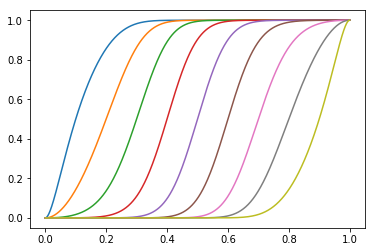

In [68]:
X = np.linspace(0,1, num = 1000)
Y = np.arange(0.1,1,0.1)

for y in Y:
    plt.plot( X, match_win_2_of_3(X, y))


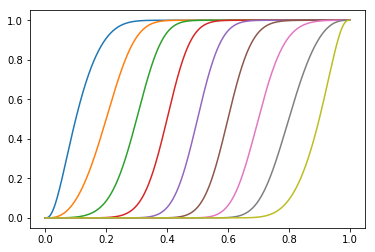

In [69]:
for y in Y:
    plt.plot( X, match_win_3_of_5(X, y))

In [70]:
display(maleServeSummaryDF.loc['David Goffin', 'P_Win_Serve'])

0.6023570338291151

# Model Output

In [71]:

""" If there is not data for a player, return 0.5 as the probability they win a rally on their serve
    Note that the below function takes a summary_dataframe with an index of player names and a column title P_Win_Serve.
    Thus to change the probabilities being run through the model, we need only create a new dataframe of rally probabilities 
    indexed by player. These probabilities could be empirical lifetime averages, averages over the last tournament, averages over
    the court type to be used in the upcoming tournament, the result of bayesian inference etc.
"""
def probability_return(summary_dataframe, player):
    try:
        result = summary_dataframe.loc[player, 'P_Win_Serve']
    except:
        # could perhaps return the average of probabilities across the dataset
        result = 0.5
    return result

maleIndexes = list(maleSubmission.index.values) 

# Change probabilities in submission dataset to align with the developed model
for x in maleIndexes:
    maleSubmission.at[x, 'player_1_win_probability'] = match_win_2_of_3(
        probability_return(maleServeSummaryDF, maleSubmission.loc[x, 'player_1']) ,\
        probability_return(maleServeSummaryDF, maleSubmission.loc[x, 'player_2']))
    
# Write output to a csv file    
maleSubmission.to_csv(src+'\\output\\men_final_submission_file.csv')






In [72]:
maleSubmission.head()

,player_1,player_2,player_1_win_probability
0,Novak Djokovic,Rafael Nadal,0.535809
1,Novak Djokovic,Roger Federer,0.369546
2,Novak Djokovic,Juan Martin del Potro,0.541258
3,Novak Djokovic,Alexander Zverev,0.728863
4,Novak Djokovic,Kevin Anderson,0.530155
